# DATATHALON  
**Bhakthula Pranay**
 

These crash data are derived from the Metropolitan Police Department's (MPD) crash data management system (COBALT) 
and represent DDOT's attempt to summarize some of the most requested elements of the crash data.  
Further, DDOT has attempted to enhance this summary by locating each crash location along the DDOT center line, 
providing a number of location references for each crash.  
In the event that location data is missing or incomplete for a crash, it is unable to be published within this dataset.


we are going to perform data analysis on "Crash_Details_Table.csv" file.  

Crash details related table,
1. Type of participant (driver, occupant, bicyclist, pedestrian)
2. Age of participants
3. If injured, severity (minor, major, fatal)
4. Type of vehicle (passenger car, large truck, taxi, government, bicycle, pedestrian, etc)
If persons issued a ticket
5. If a vehicle, the state (jurisdiction) license plate was issued (not license plate number)
6. Are any persons deemed ‘impaired’
7. Was person in vehicle where speeding was indicated

# PREPROCESSING:  
## importing libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## importing data set  

In [139]:
data=pd.read_csv("Crash_Details_Table.csv",low_memory=False)  
data.head()

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,438194351,26872544,16034312,84628234,Passenger,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,Y,N
1,438194352,26872544,16034312,84833902,Passenger,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,Y,N
2,438194353,26872544,16034312,84938064,Driver,NaN,N,N,N,2275007,Passenger Car/automobile,N,None,N,N
3,438194354,26872544,16034312,84790164,Driver,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,N,N
4,438194355,26872544,16034312,84953497,Passenger,47.0,N,N,Y,2275008,Passenger Car/automobile,N,VA,Y,N


## drop missing values  

In [140]:
data=data.dropna()  

## data reduction column wise

In [141]:
data=data.drop(['OBJECTID','CRIMEID','CCN','PERSONID','VEHICLEID'],axis=1)

## data reduction rows wise

In [142]:
print(data.describe())

                 AGE
count  426744.000000
mean       38.668302
std        20.897059
min     -7990.000000
25%        27.000000
50%        37.000000
75%        51.000000
max       237.000000


Since we observe that there are observations for AGE above 100 and also below 0 which is not possible  
considering average lifespan of humans.   
So we remove those rows having AGE>100 and AGE<=0.  


In [143]:
data=data[(data['AGE']<100)&(data['AGE']>0)]
print('after removing data below the age of 0 and above the age of 100 ')
print(data.describe())

after removing data below the age of 0 and above the age of 100 
                 AGE
count  413223.000000
mean       39.883937
std        15.448436
min         1.000000
25%        28.000000
50%        38.000000
75%        51.000000
max        99.000000


## merging FATAL,MAJORINJURY,MINORINJURY into one variable - Fatal  

In [144]:
data['Fatal']='NOINJURY'  

fat=data['FATAL'].copy()  
maj=data['MAJORINJURY'].copy()  
mino=data['MINORINJURY'].copy()  

fat[fat=='N']=0  
fat[fat=='Y']=1  

maj[maj=='N']=0  
maj[maj=='Y']=1  

mino[mino=='N']=0  
mino[mino=='Y']=1  

Fatal=data['Fatal'].copy()  
Fatal[fat==1]='FATAL'  
Fatal[maj==1]='MAJORINJURY'  
Fatal[mino==1]='MINORINJURY'  

data['Fatal']=Fatal  

In [145]:
data1=data.drop(['FATAL','MAJORINJURY','MINORINJURY'],axis=1)

In [146]:
data1.head()

,PERSONTYPE,AGE,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING,Fatal
0,Passenger,31.0,Passenger Car/automobile,N,VA,Y,N,NOINJURY
1,Passenger,31.0,Passenger Car/automobile,N,VA,Y,N,NOINJURY
3,Driver,31.0,Passenger Car/automobile,N,VA,N,N,NOINJURY
4,Passenger,47.0,Passenger Car/automobile,N,VA,Y,N,MINORINJURY
5,Driver,63.0,Passenger Car/automobile,N,VA,N,N,NOINJURY


## changing the data types of necessary variables to categorical data type

In [147]:
data1['TICKETISSUED']=data1['TICKETISSUED'].astype('category')
data1['IMPAIRED']=data1['IMPAIRED'].astype('category')
data1['SPEEDING']=data1['SPEEDING'].astype('category')
data1['Fatal']=data1['Fatal'].astype('category')

# Exploratory Data Analysis (EDA):
## unique values of various columns 

In [148]:
print('types of persons')
print(list(data1['PERSONTYPE'].unique()))
print('\n')
print('types of vehicles')
print(list(data1['INVEHICLETYPE'].unique()))
print('\n')
print('various types of license plates of different states')
print(list(data1['LICENSEPLATESTATE'].unique()))


types of persons
['Passenger', 'Driver', 'Pedestrian', 'Bicyclist']


types of vehicles
['Passenger Car/automobile', 'Other Vehicle', 'Suv (sport Utility Vehicle)', 'Large/heavy Truck', 'Cargo Van', 'None', 'Passenger Van', 'Firearms', 'Other Small/light Truck', 'Bus', 'Atv (all Terrain Vehicle)', 'Moped/scooter', 'Pickup Truck', 'Motor Cycle', 'Drugs/ Narcotics', 'Construction/industrial Equipment', 'Trailer', 'Farm Equipment', 'Motorhome/camper/rv (recreational Vehicle)', 'Snow Mobile', 'Watercraft/boat', 'Aircraft']


various types of license plates of different states
['VA', 'NY', 'MD', 'IN', 'DC', ' None', 'IL', 'WV', 'OH', 'US', 'PA', 'UT', 'NJ', 'CT', 'AZ', 'CA', 'NC', 'Ot', 'TX', 'LA', 'SC', 'Di', 'FL', 'KY', 'Un', 'MA', 'AL', 'GA', 'DE', 'OK', 'MN', 'TN', 'MI', 'MO', 'CO', 'VT', 'NH', 'ID', 'KS', 'OR', 'MS', 'AR', 'Ou', 'ME', 'ND', 'WA', 'WI', 'AK', 'NM', 'Vi', 'IA', 'NE', 'RI', 'NV', 'WY', 'SD', 'MT', 'HI']


## histogram - persontype vs count

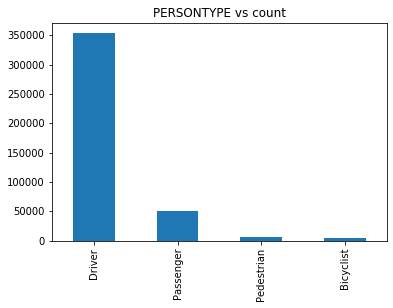

In [149]:
data1['PERSONTYPE'].value_counts().plot(kind='bar')
plt.title('PERSONTYPE vs count')
plt.show()

We can observe that of all the types of persons involved in accidents, Drivers are the most in number,  
followed by passenger, Pedestrian and Bicyclist in decreasing order. There is a large difference between count of   
accidents of all the other types of persons and drivers.  

## histogram - AGE vs count

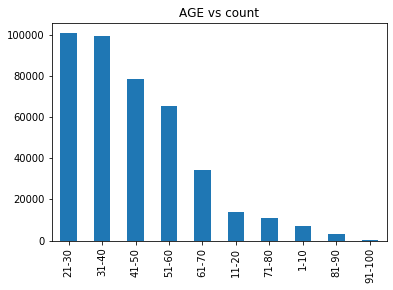

In [150]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
age1= pd.cut(data1['AGE'], bins=bins, labels=labels, right=False)

age1.value_counts().plot(kind='bar')
plt.title('AGE vs count')
plt.show()


We can observe that the age group 21-40 are recoreded the most in our dataset, followed by age groups 41-50, 51-60  
and 61-70 in decreasing order. age groups 1-20,71-100 are less recoreded. The age group 91-100 is the least recorded age group. 

## histogram - Fatal vs count  

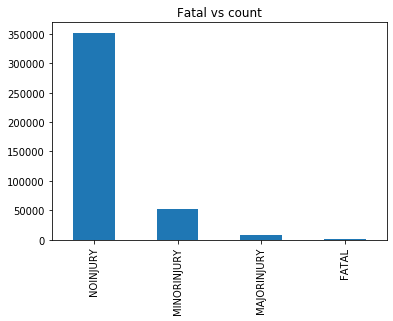

In [151]:
data1['Fatal'].value_counts().plot(kind='bar')
plt.title('Fatal vs count')
plt.show()

Since our concentration is on injuries, we remove 'NOINJURY' count.

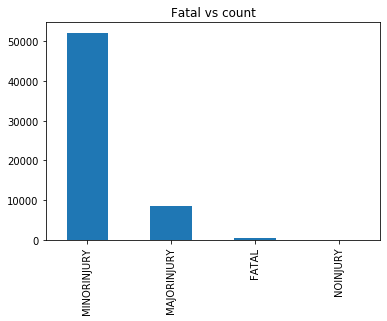

In [152]:
data1[data1['Fatal']!='NOINJURY']['Fatal'].value_counts().plot(kind='bar')
plt.title('Fatal vs count')
plt.show()

we can observe that most of the injuries are minor injuries, followed by major injuries and 
least of the injuries are FATAL injuries.

In [153]:
fatal_per=len(Fatal[Fatal=='FATAL'])/len(Fatal)
major_per=len(Fatal[Fatal=='MAJORINJURY'])/len(Fatal)
minor_per=len(Fatal[Fatal=='MINORINJURY'])/len(Fatal)
noinjury_per=1-(fatal_per+major_per+minor_per)

print("% of fatal injury in data = {:.3f} %".format(fatal_per*100))
print("% of major injury in data = {:.3f} %" .format(major_per*100))
print("% of minor injury in data = {:.3f} %" .format(minor_per*100))
print("% of no injury in data = {:.3f} %" .format(noinjury_per*100))

% of fatal injury in data = 0.073 %
% of major injury in data = 2.054 %
% of minor injury in data = 12.641 %
% of no injury in data = 85.232 %


## vehicle type vs count

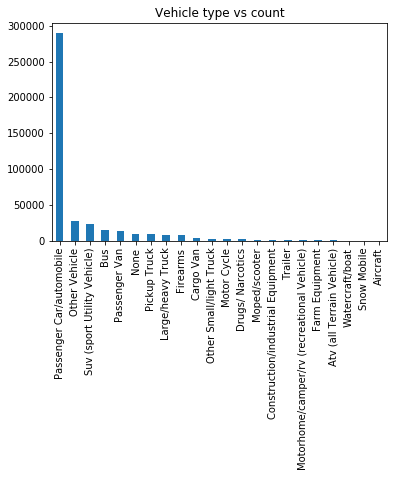

In [154]:
data1['INVEHICLETYPE'].value_counts().plot(kind='bar')
plt.title('Vehicle type vs count')
plt.show()

We can observe that 'Passenger Car/automobile' has the most accidents recorded in the data.
since in the above plot the data looks conjusted lets remove 'Passenger Car/automobile' from the graph and
look at the next 10 types of vehicles.


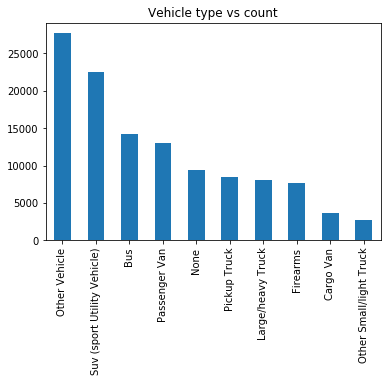

In [155]:
data1['INVEHICLETYPE'].value_counts().head(11)[1:].plot(kind='bar')
plt.title('Vehicle type vs count')
plt.show()

## top 10 state liscense plates with most accidents

In [156]:
data1['LICENSEPLATESTATE'].value_counts().head(10)

DC       164197
MD       134318
VA        58767
 None     23878
PA         3145
FL         2541
NC         2538
NY         2265
NJ         2155
US         1646
Name: LICENSEPLATESTATE, dtype: int64

we can observe that license plate 'DC' has the most accidents followed by Mary Land,Virginia. We can also observe that there are lot (23878)
number of vehicles with 'no' license plates by looking at ' None' license plate type.  

## bottom 10 state liscense plates with most accidents

In [157]:
data1['LICENSEPLATESTATE'].value_counts().tail(10)

UT    54
NV    53
WY    53
Vi    44
AK    40
MT    39
ID    29
SD    25
ND    25
HI     9
Name: LICENSEPLATESTATE, dtype: int64

we can observe that license plate 'Hawaii' has the least accidents followed by North Dakota,South Dakota.  

In [158]:
print('FATAL injuries while speeding =',data1[(data1['Fatal']=='FATAL')&(data1['SPEEDING']=='Y')]['Fatal'].count())
print('MAJOR injuries while speeding =',data1[(data1['Fatal']=='MAJORINJURY')&(data1['SPEEDING']=='Y')]['Fatal'].count())
print('MINOR injuries while speeding =',data1[(data1['Fatal']=='MINORINJURY')&(data1['SPEEDING']=='Y')]['Fatal'].count())


FATAL injuries while speeding = 45
MAJOR injuries while speeding = 215
MINOR injuries while speeding = 563


In [159]:
print('FATAL injuries while IMPAIRED =',data1[(data1['Fatal']=='FATAL')&(data1['IMPAIRED']=='Y')]['Fatal'].count())
print('MAJOR injuries while IMPAIRED =',data1[(data1['Fatal']=='MAJORINJURY')&(data1['IMPAIRED']=='Y')]['Fatal'].count())
print('MINOR injuries while IMPAIRED =',data1[(data1['Fatal']=='MINORINJURY')&(data1['IMPAIRED']=='Y')]['Fatal'].count())

FATAL injuries while IMPAIRED = 6
MAJOR injuries while IMPAIRED = 114
MINOR injuries while IMPAIRED = 710


In [160]:
print('FATAL injuries while TICKETISSUED =',data1[(data1['Fatal']=='FATAL')&(data1['TICKETISSUED']=='Y')]['Fatal'].count())
print('MAJOR injuries while TICKETISSUED =',data1[(data1['Fatal']=='MAJORINJURY')&(data1['TICKETISSUED']=='Y')]['Fatal'].count())
print('MINOR injuries while TICKETISSUED =',data1[(data1['Fatal']=='MINORINJURY')&(data1['TICKETISSUED']=='Y')]['Fatal'].count())

FATAL injuries while TICKETISSUED = 37
MAJOR injuries while TICKETISSUED = 470
MINOR injuries while TICKETISSUED = 8876


In [161]:
data2=data1.copy()

We can observe that we don not need 'INVEHICLETYPE', 'LICENSEPLATESTATE' variables for regression as  
they are string variable and have many unique values. So One Hot Encoding will create many number of columns.  

In [162]:
data2['FATAL']=data['FATAL'].copy()
data2['MAJORINJURY']=data['MAJORINJURY'].copy()
data2['MINORINJURY']=data['MINORINJURY'].copy()
data2.head()


,PERSONTYPE,AGE,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING,Fatal,FATAL,MAJORINJURY,MINORINJURY
0,Passenger,31.0,Passenger Car/automobile,N,VA,Y,N,NOINJURY,N,N,N
1,Passenger,31.0,Passenger Car/automobile,N,VA,Y,N,NOINJURY,N,N,N
3,Driver,31.0,Passenger Car/automobile,N,VA,N,N,NOINJURY,N,N,N
4,Passenger,47.0,Passenger Car/automobile,N,VA,Y,N,MINORINJURY,N,N,Y
5,Driver,63.0,Passenger Car/automobile,N,VA,N,N,NOINJURY,N,N,N


## Feature selection:

In [163]:
X=data2.iloc[:,:-4].values
Y1=data2.iloc[:,-3].values
Y2=data2.iloc[:,-2].values
Y3=data2.iloc[:,-1].values

Y1 - FATAL  
Y2 - MAJORINJURY  
Y3 - MINORINJURY  

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

to avoid dummy variable trap drop 4th column in 'X'

In [165]:
X=np.delete(X,3,axis=1)

**One Hot Encoding the variables:**

In [166]:
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
X=np.array(ct1.fit_transform(X))

In [167]:
ct2=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-3])],remainder='passthrough')
X=np.array(ct2.fit_transform(X))

We have applied One Hot Encoding on persontype, vehicletype and State License plate.

**Label Encoding**  
For X variables -

In [168]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
X[:,-3]=le1.fit_transform(X[:,-3])
X[:,-2]=le1.fit_transform(X[:,-2])
X[:,-1]=le1.fit_transform(X[:,-1])

We have applied Label Encoding on TicketIssued, Impaired and Speeding.

For Y variables -

In [169]:
Y1=le1.fit_transform(Y1)
Y2=le1.fit_transform(Y2)
Y3=le1.fit_transform(Y3)

## Linear model on Y1:  
### train, test split - 

In [170]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y1,test_size=0.2,random_state=1)

**Standardization -**

In [171]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
z1=X1_train[:,-4].reshape(-1,1)
z2=X1_test[:,-4].reshape(-1,1)
z4=sc1.fit_transform(z1)
z5=sc1.transform(z2)

In [172]:
z4=z4.reshape(-1)
z5=z5.reshape(-1)
X1_train[:,-4]=z4
X1_test[:,-4]=z5

### Linear regression on Y1:

In [173]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
Y1_pred=regressor1.predict(X1_test)

compare predicted values with test values

In [175]:
compare1=np.concatenate( ( Y1_pred.reshape(len(Y1_pred),1) ,Y1_test.reshape(len(Y1_test),1) ), axis=1)
np.set_printoptions(precision=2)
print(compare1)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### scatter plot - test vs predicted:

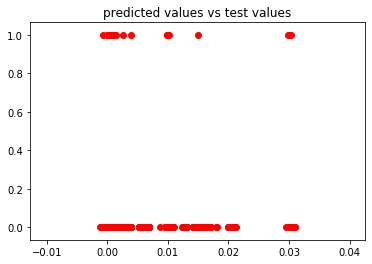

In [176]:
plt.scatter(Y1_pred,Y1_test,color='red')
plt.title('predicted values vs test values')
plt.show()

### Adjusted R-squared value

In [177]:
from sklearn.metrics import r2_score
print('adj r2 =',r2_score(Y1_test,Y1_pred))

adj r2 = -0.0015164861134204788


**From the above adjusted r2 value we can say that the model is insufficient to predict 'FATAL' injuries.**  
**The reason might be  due to low number of observarions for 'FATAL' injuries.**

## Linear model on Y2:  
### train, test split - 

In [178]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y2,test_size=0.2,random_state=1)

**Standardization -**

In [179]:
sc2=StandardScaler()
z1=X2_train[:,-4].reshape(-1,1)
z2=X2_test[:,-4].reshape(-1,1)

z4=sc2.fit_transform(z1)
z5=sc2.transform(z2)

z4=z4.reshape(-1)
z5=z5.reshape(-1)
X2_train[:,-4]=z4
X2_test[:,-4]=z5



### Linear regression on Y2

In [180]:
regressor2=LinearRegression()
regressor2.fit(X2_train,Y2_train)

Y2_pred=regressor2.predict(X2_test)

compare predicted values with test values

In [181]:
compare2=np.concatenate( ( Y2_pred.reshape(len(Y2_pred),1) ,Y2_test.reshape(len(Y2_test),1) ), axis=1)
np.set_printoptions(precision=2)
print(compare2)

[[0.01 0.  ]
 [0.02 0.  ]
 [0.02 0.  ]
 ...
 [0.02 0.  ]
 [0.01 0.  ]
 [0.02 0.  ]]


### scatter plot - test vs predicted:

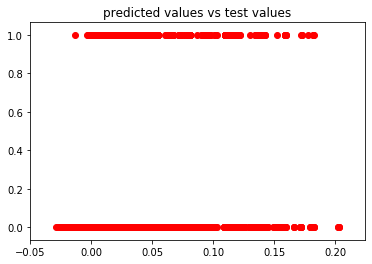

In [182]:
plt.scatter(Y2_pred,Y2_test,color='red')
plt.title('predicted values vs test values')
plt.show()

### Adjusted R-squared value

In [183]:
print('adj r2 =',r2_score(Y2_test,Y2_pred))

adj r2 = 0.01691186194858829


**From the above adjusted r2 value is low and we can say that the model is insufficient to predict 'MAJOR' injuries.**  
**The reason might be  due to low number of observarions for 'MAJOR' injuries, but this r2 values is better that 'FATAL' r2 value.**

## Linear model on Y3:  
### train, test split - 

In [184]:
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X,Y3,test_size=0.2,random_state=1)

**Standardization -**

In [185]:
sc3=StandardScaler()
z1=X2_train[:,-4].reshape(-1,1)
z2=X2_test[:,-4].reshape(-1,1)
z4=sc3.fit_transform(z1)
z5=sc3.transform(z2)
z4=z4.reshape(-1)
z5=z5.reshape(-1)
X2_train[:,-4]=z4
X2_test[:,-4]=z5



### Linear regression on Y3

In [186]:
regressor3=LinearRegression()
regressor3.fit(X3_train,Y3_train)

Y3_pred=regressor3.predict(X3_test)

compare predicted values with test values

In [187]:
compare3=np.concatenate( ( Y3_pred.reshape(len(Y3_pred),1) ,Y3_test.reshape(len(Y3_test),1) ), axis=1)
np.set_printoptions(precision=2)
print(compare3)

[[0.12 0.  ]
 [0.12 0.  ]
 [0.08 0.  ]
 ...
 [0.1  0.  ]
 [0.2  0.  ]
 [0.1  0.  ]]


### scatter plot - test vs predicted:

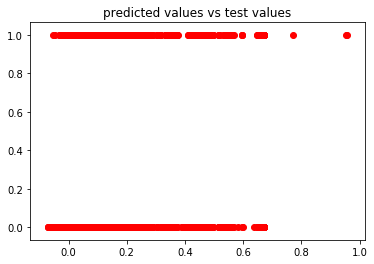

In [188]:
plt.scatter(Y3_pred,Y3_test,color='red')
plt.title('predicted values vs test values')
plt.show()

### Adjusted R-squared value

In [189]:
print('adj r2',r2_score(Y3_test,Y3_pred))

adj r2 0.09211836381617577


**From the above adjusted r2 value is low and we can say that the model is insufficient to predict 'MINOR' injuries.**  
**The reason might be  due to low number of observarions for 'MAJOR' injuries, but this r2 values is better that 'FATAL' and 'MAJOR' r2 value.**

### policies to implement strongly:
To avoid road accidents we should follow following rules:
    1. avoid driving above speed limit.
    2. avoid driving when the driver is impaired.
    3. avoid driving so as the tickets are issued.
    these 3 are rules are suggested from observing EDA in above data analysis.

### JOURNALS-
https://www.who.int/violence_injury_prevention/publications/road_traffic/Media_brief_all_factsheets_web_rev_nov_2017.pdf

https://www.who.int/violence_injury_prevention/publications/road_traffic/world_report/speed_en.pdf    